# Master Thesis


In [1]:
from utils import *
from network import *
from networkx.algorithms import bipartite

from collections import Counter
import pandas as pd
import json
import math
from scipy import stats

%load_ext autoreload
%autoreload 2
net = Network()


In [7]:
def get_results(centrality) : 
    artists_dict = dict()
    for row in results : 
        for art in row['artists'] :
            for c in  centrality:
                if art['name'] == c :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = set()
                    for r in art['role']:
                        artists_dict[art['name']].add(r)
                    break    
    return artists_dict

# Bipartite Graph

In [2]:
results = None
with open('../data/albums/jazz/album-final.json',encoding="UTF-8") as f:
        results = json.load(f)   

In [4]:
bipartite_jazz_net =  net.build_bipartite_network(results,'title','artists','year')

In [ ]:
centralities = net.get_bipartite_degree_centrality(bipartite_jazz_net)

In [95]:
names  = centralities

In [73]:
names  = centralities
idx =1
for n in names :
    print(idx,"-",n,"-",get_results(centralities)[n])
    idx+=1

1 - rudy van gelder - {'mixed', 'mastered', 'engineer', 'lacquer cut', 'recorded', 'remastered'}
2 - manfred eicher - {'liner notes', 'mixed', 'mastered', 'producer', 'executive producer', 'supervised', 'co producer', 'engineer', 'technician', 'edited'}
3 - francis wolff - {'design', 'photography', 'producer', 'cover'}
4 - reid miles - {'cover', 'artwork', 'art direction', 'design', 'photography'}
5 - alfred lion - {'producer'}
6 - nat hentoff - {'supervised', 'liner notes', 'producer', 'sleeve notes'}
7 - jan erik kongshaug - {'mixed', 'mastered', 'field recording', 'engineer', 'edited', 'recorded'}
8 - ron carter - {'main artist', 'recorder', 'double bass', 'producer', 'soloist', 'composed', 'conductor', 'strings', 'written', 'arranged', 'cello', 'piccolo'}
9 - creed taylor - {'producer'}
10 - herbie hancock - {'main artist', 'organ', 'harp', 'drum programming', 'drum machine', 'conductor', 'written', 'featuring', 'producer', 'piano', 'performer', 'guest', 'percussion', 'arranged', '

In [8]:
len(get_results(centralities).keys())

14

# jazz Album projection network 

In [5]:
albums = [x for x,y in bipartite_jazz_net.nodes(data=True) if y['type']=='Album']
jazz_album_projection_network =  bipartite.weighted_projected_graph(bipartite_jazz_net, albums, multigraph=False)
#jazz_album_projection_network = net.build_album_projection_network(albums,'title','artists','year')
net.get_network_info(jazz_album_projection_network)

nb nodes:  4741
nb edges:  369779
Min node degree:  0
Max node degree:  941
Avg node degree:  155.99198481333053


In [13]:
largest_cc = max(nx.connected_components(jazz_album_projection_network), key=len)
largest_cc = jazz_album_projection_network.subgraph(largest_cc)
net.get_avg_path_length(largest_cc)

get_avg_path_length:  2.8330139350781245


In [25]:
net.get_diameter(largest_cc)
net.get_density(jazz_album_projection_network)
net.get_nb_of_connected_comp(jazz_album_projection_network)
net.get_avg_weighted_degree(jazz_album_projection_network)
net.get_avg_clustering_coefficent(jazz_album_projection_network)

Diameter :  11
Density :  0.0329097014374115
Nb connected components :  208
Avg weighted degree :  2476025.6645222525
Average clustering coefficient :  0.5362826376872663


## clustering coefficient

In [22]:
nb_solo = 0
for r in results : 
    if len(r['artists']) <= 3 :
        nb_solo+=1
nb_solo        

337

69


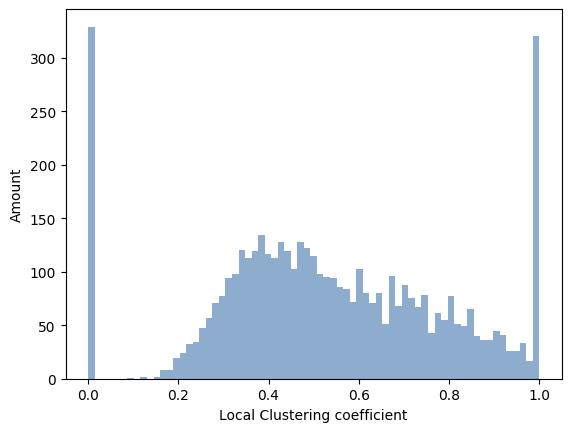

In [16]:
net.plot_hist_clustering_coeff_by_amount(jazz_album_projection_network)

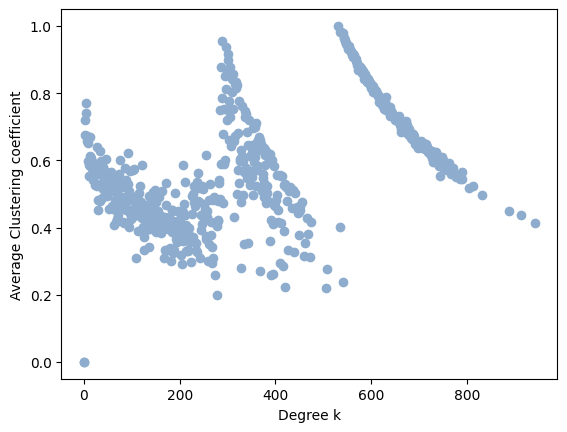

In [23]:
net.plot_clustering_coeff_by_degree(jazz_album_projection_network)

In [108]:
net.save_graph(jazz_album_projection_network,"../networks/gephi/jazz_album_projection_network.gexf")

# Jazz collaborators network 

In [7]:
collaborators = [x for x,y in bipartite_jazz_net.nodes(data=True) if y['type']=='Artist']
collaborators_projection_network =  bipartite.weighted_projected_graph(bipartite_jazz_net, collaborators, multigraph=False) 
net.save_graph(collaborators_projection_network,"../networks/gephi/jazz_collaborators_projection.gexf")

## General Network  info

In [15]:
largest_cc = max(nx.connected_components(collaborators_projection_network), key=len)
largest_cc = collaborators_projection_network.subgraph(largest_cc)

In [20]:
net.get_network_info(collaborators_projection_network)      
net.get_diameter(largest_cc)
net.get_density(collaborators_projection_network)
net.get_nb_of_connected_comp(collaborators_projection_network)
net.get_avg_weighted_degree(collaborators_projection_network)
net.get_avg_clustering_coefficent(collaborators_projection_network)
net.get_avg_path_length(largest_cc)

Diameter :  12
Density :  0.0014801664464818677
Nb connected components :  208
Avg weighted degree :  3166474822.5064344
Average clustering coefficient :  0.8453609697036518


In [ ]:
top50musicians = sorted(collaborators_projection_network.degree, key=lambda x: x[1], reverse=True)
top50musicians

## Local Clustering coefficient

153


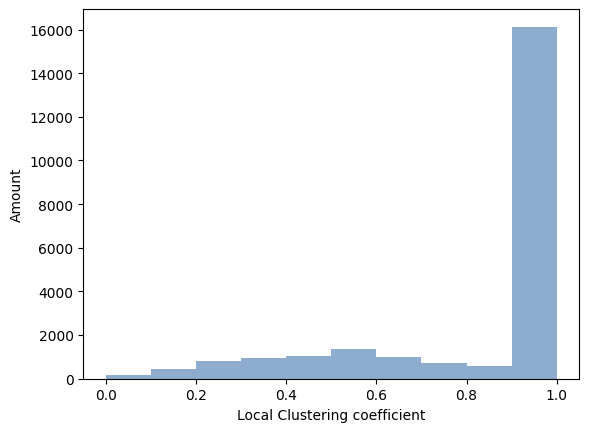

In [43]:
net.plot_hist_clustering_coeff_by_amount(collaborators_projection_network)

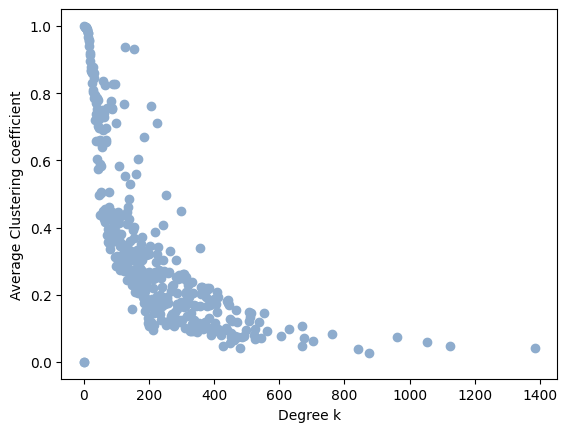

In [37]:
net.plot_clustering_coeff_by_degree(collaborators_projection_network)

## Centralities Analysis

### Degree centralities

In [106]:
top_artists_names = net.get_degree_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

### Eigenvector centralities

In [ ]:
top_artists_names = net.get_eigenvector_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

### Betweenness centrality

In [ ]:
top_artists_names = net.get_betweenness_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

### Correlation between the centralities 

In [9]:
names = net.get_spearman_corr(collaborators_projection_network)

Spearman corr between projected degree k and betweenness centrality SignificanceResult(statistic=0.9988715437443674, pvalue=2.8063564772254223e-25)
Spearman corr between projected degree k and eigenvector centrality is  SignificanceResult(statistic=0.950163493671981, pvalue=1.502221594959727e-10)
Spearman corr between betweenness centrality and eigenvector centrality SignificanceResult(statistic=0.950163493671981, pvalue=1.502221594959727e-10)


In [40]:
artists_dict = dict()
artist_set = set()
for c in names:
   artist_set.add(collaborators_projection_network.nodes[c]['name'])
artist_set

{'al schmitt',
 'bernie grundman',
 'bill frisell',
 'bob ludwig',
 'chick corea',
 'dave holland',
 'david baker',
 'evan parker',
 'greg calbi',
 'herbie hancock',
 'hermeto pascoal',
 'jack dejohnette',
 'jan erik kongshaug',
 'kenny wheeler',
 'manfred eicher',
 'martin s. gold',
 'ron carter',
 'rudy van gelder',
 'scott hull',
 'wayne shorter'}

# All Time album Network

In [1]:
albums = None
with open('../data/albums/all_time_album-final.json',encoding="UTF-8") as f:
        albums = json.load(f)   

FileNotFoundError: [Errno 2] No such file or directory: '../data/albums/all_time_album-final.json'

In [33]:
album_projection_network = net.build_album_projection_network(albums,'title','artists')
net.get_network_info(album_projection_network)

nb nodes:  3971
nb edges:  46696
Min node degree:  0
Max node degree:  200
Avg node degree:  23.518509191639385


In [34]:
net.save_graph(album_projection_network,"../networks/gephi/all_time_album_projection.gexf")

In [30]:
collaborators_projection_network = net.build_collaborators_projection_network(albums,'artists')
net.get_network_info(collaborators_projection_network)     

nb nodes:  27406
nb edges:  37354
Min node degree:  1
Max node degree:  153
Avg node degree:  2.725972414799679


In [31]:
net.save_graph(collaborators_projection_network,"../networks/gephi/all_time_collaborators_projection.gexf")

# Montreux

In [2]:
mjf = None
with open('../data/mjf/mfj_export_clean-final.json',encoding="UTF-8") as f:
        mjf = json.load(f)      
results = mjf

In [22]:
def get_results_bipartite(c) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
                if art['name'] == c :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                    for r in art['role']:
                        artists_dict[art['name']].append(r)
                    break    
    return artists_dict

In [23]:
def get_results(c) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
                if art['id'] == int(str(c)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                   
                    if len( art['role']) == 0 : 
                        artists_dict[art['name']].append("none")

                    for r in art['role']:
                        artists_dict[art['name']].append(r)
                   
                    break    
                
    return artists_dict

In [24]:
def get_details_by_centrality(centrality) :
    idx = 1
    for n in centrality :
        result = get_results(n)
        print(idx,"-",list(result.keys())[0],"-",Counter(list(result.values())[0]))
        idx+=1

In [6]:
def gender_dist_top100(musicians,df_gender):
    #Gender distribution
    genders = list()
    for id in musicians[:100]  :
        gender = df_gender[df_gender["id"] == int(str(id)[3:])]["gender"].iloc[0]
        if gender != "unknown":
            genders.append(gender)
    print(pd.Series(Counter(genders)))

In [7]:
df = pd.read_csv("../data/artists/mjf_art_gender.csv",sep=",")

## Bipartite Graph

In [3]:
bipartite_mjf_net = net.build_bipartite_network(results,'name','musicians','date','categories',2000)
net.get_network_info(bipartite_mjf_net)

nb nodes:  21919
nb edges:  26552
Min node degree:  1
Max node degree:  83
Avg node degree:  2.4227382636069166


In [68]:
bd_centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)[0][:20]

### Bipartite degree centrality before year 2000

In [18]:
bd_centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)[0]
get_details_by_centrality(bd_centralities[:20])

1 - claude nobs - Counter({'harmonica': 63, 'none': 9, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'none': 2, 'synthesizer': 1})
3 - herbie hancock - Counter({'piano': 35, 'keyboards': 14, 'none': 1})
4 - david sanborn - Counter({'saxophone': 32})
5 - milt jackson - Counter({'vibraphone': 19})
6 - nathan east - Counter({'recorder': 23, 'vocals': 3})
7 - niels pedersen - Counter({'recorder': 15, 'double bass': 1})
8 - dizzy gillespie - Counter({'trumpet': 13, 'none': 3, 'vocals': 1, 'harp': 1})
9 - al jarreau - Counter({'vocals': 22, 'none': 2, 'vocal': 1, 'marimba': 1, 'drums': 1})
10 - rachelle ferrell - Counter({'vocals': 20, 'piano': 4, 'keyboards': 1})
11 - calep emphrey, jr. - Counter({'drums': 20})
12 - billy cobham - Counter({'drums': 19, 'percussions': 1, 'none': 1})
13 - michael brecker - Counter({'saxophone': 12, 'recorder': 5, 'electronic wind instrument   ewi': 2})
14 - clark terry - Counter({'trumpet': 11

In [13]:
gender_dist_top100(bd_centralities[:100],df)

male      94
female     5
dtype: int64


In [16]:
bd_centralities[:20]

[999845,
 999133,
 999628,
 999864,
 9997804,
 9994056,
 99913730,
 999143,
 9991529,
 9991112,
 9997401,
 999517,
 9996698,
 99912624,
 9997806,
 9991610,
 99914193,
 99914259,
 9991093,
 999139]

In [17]:
sorted(bipartite_mjf_net.degree, key=lambda x: x[1], reverse=True)

[(907, 51),
 (999845, 50),
 (2349, 48),
 (2408, 48),
 (999133, 41),
 (2780, 41),
 (2781, 40),
 (2604, 39),
 (909, 38),
 (2566, 37),
 (1206, 35),
 (915, 32),
 (858, 32),
 (1240, 31),
 (2645, 30),
 (894, 29),
 (2429, 28),
 (709, 27),
 (2479, 27),
 (2363, 26),
 (2362, 25),
 (2663, 25),
 (2778, 25),
 (1345, 25),
 (2277, 24),
 (2078, 24),
 (2361, 24),
 (2784, 24),
 (1179, 24),
 (1468, 24),
 (95, 23),
 (1249, 23),
 (932, 22),
 (1832, 22),
 (2384, 22),
 (2483, 22),
 (2638, 22),
 (2779, 22),
 (321, 21),
 (999628, 21),
 (999864, 21),
 (2276, 21),
 (2139, 21),
 (2427, 21),
 (1264, 21),
 (1392, 21),
 (1967, 20),
 (2268, 20),
 (2371, 20),
 (2434, 20),
 (1317, 20),
 (4047, 19),
 (9997804, 19),
 (6393, 19),
 (2169, 19),
 (2278, 19),
 (2099, 19),
 (992, 19),
 (718, 19),
 (901, 19),
 (2375, 19),
 (2544, 19),
 (2580, 19),
 (2782, 19),
 (1464, 19),
 (1266, 19),
 (360, 18),
 (328, 18),
 (205, 18),
 (588, 18),
 (9994056, 18),
 (759, 18),
 (2532, 18),
 (1337, 18),
 (4067, 17),
 (317, 17),
 (1871, 17),
 (19

### Bipartite degree centrality after year 2000

In [20]:
bd_centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)[0]
get_details_by_centrality(bd_centralities[:20])

1 - claude nobs - Counter({'harmonica': 63, 'none': 9, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - herbie hancock - Counter({'piano': 35, 'keyboards': 14, 'none': 1})
3 - angélique kidjo - Counter({'vocals': 17, 'none': 2})
4 - carlos santana - Counter({'guitar': 18, 'none': 4, 'vocals': 4, 'percussions': 1})
5 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'none': 2, 'synthesizer': 1})
6 - joe sample - Counter({'piano': 19, 'keyboards': 9, 'none': 1})
7 - chick corea - Counter({'piano': 21, 'keyboards': 5, 'organ': 1})
8 - george benson - Counter({'guitar': 23, 'vocals': 22, 'none': 3})
9 - marcus miller - Counter({'recorder': 19, 'clarinet': 6, 'saxophone': 4, 'vocals': 2, 'none': 2, 'turntables': 1, 'double bass': 1, 'keyboards': 1, 'gumbri': 1})
10 - quincy jones - Counter({'none': 19, 'vocals': 4})
11 - john mclaughlin - Counter({'guitar': 25, 'vocals': 1})
12 - lee ritenour - Counter({'guitar': 17})
13 - david sanborn - Counter({'saxophone': 32})
14 - ches

In [21]:
gender_dist_top100(bd_centralities[:100],df)

male      88
female    11
dtype: int64


In [22]:
bd_centralities[:10]

[999845,
 999628,
 999949,
 9991371,
 999133,
 9991610,
 9991454,
 9991107,
 999120,
 9991477]

In [23]:
sorted(bipartite_mjf_net.degree, key=lambda x: x[1], reverse=True)

[(3148, 83),
 (5590, 77),
 (5267, 67),
 (3394, 57),
 (3392, 51),
 (4313, 48),
 (5383, 48),
 (4375, 45),
 (3257, 41),
 (3961, 41),
 (3301, 35),
 (5254, 35),
 (3836, 30),
 (4543, 28),
 (4682, 28),
 (3566, 27),
 (3777, 26),
 (4369, 26),
 (5499, 25),
 (1075, 24),
 (999845, 24),
 (3206, 24),
 (3254, 24),
 (5013, 24),
 (5353, 24),
 (3570, 23),
 (5465, 23),
 (999628, 22),
 (3808, 22),
 (3807, 22),
 (3393, 21),
 (3246, 21),
 (4367, 21),
 (4368, 21),
 (1444, 20),
 (3732, 20),
 (3571, 20),
 (3329, 20),
 (3144, 20),
 (3346, 19),
 (3263, 19),
 (5432, 19),
 (1550, 18),
 (1578, 18),
 (3292, 18),
 (3199, 18),
 (6588, 18),
 (685, 17),
 (3793, 17),
 (3509, 17),
 (3578, 17),
 (3414, 17),
 (3463, 17),
 (3159, 17),
 (3171, 17),
 (3291, 17),
 (3211, 17),
 (3222, 17),
 (5365, 17),
 (5387, 17),
 (1101, 16),
 (1533, 16),
 (999949, 16),
 (1685, 16),
 (9991371, 16),
 (3711, 16),
 (3561, 16),
 (3465, 16),
 (3163, 16),
 (3174, 16),
 (3178, 16),
 (3219, 16),
 (3920, 16),
 (5259, 16),
 (5565, 16),
 (6569, 16),
 (65

## Events Network

In [15]:
#mjf_event_net = net.build_album_projection_network(results,'name','musicians','date')
albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
mjf_event_net = bipartite.weighted_projected_graph(bipartite_mjf_net, albums)
net.get_network_info(mjf_event_net)

nb nodes:  4280
nb edges:  22057
Min node degree:  0
Max node degree:  306
Avg node degree:  10.307009345794393


In [16]:
net.save_graph(mjf_event_net,"../networks/gephi/mjf/mjf_concerts_network.gexf")

In [7]:
largest_cc = max(nx.connected_components(mjf_event_net), key=len)
largest_cc = mjf_event_net.subgraph(largest_cc)
print("nb nodes :", len(largest_cc))
print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_event_net),"%")

nb nodes : 2875
percentage of nodes in the giant component:  67.17289719626169 %


In [15]:
largest_cc = max(nx.connected_components(mjf_event_net), key=len)
largest_cc = mjf_event_net.subgraph(largest_cc)
net.get_diameter(largest_cc)
net.get_density(mjf_event_net)
net.get_nb_of_connected_comp(mjf_event_net)
#net.get_avg_weighted_degree(mjf_event_net)
net.get_avg_clustering_coefficent(mjf_event_net)

Diameter :  17
Density :  0.0024087425440042984
Nb connected components :  1133
Average clustering coefficient :  0.38695234543548535


## Collaboration network 

In [4]:
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)

net.get_network_info(mjf_collaboration_net)

nb nodes:  17639
nb edges:  108230
Min node degree:  0
Max node degree:  550
Avg node degree:  12.271670729633199


In [13]:
net.save_graph(mjf_collaboration_net,"../networks/gephi/mjf_collaboration_network.gexf")

### Clusterirng 

133


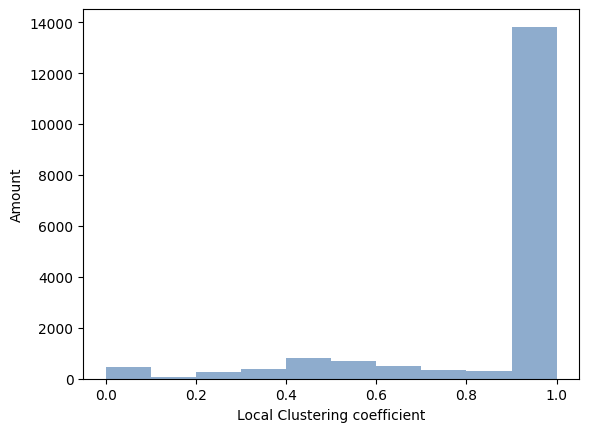

In [18]:
net.plot_hist_clustering_coeff_by_amount(mjf_collaboration_net)

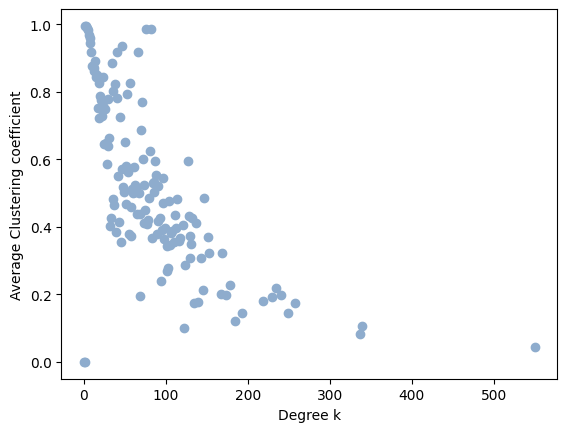

In [20]:
net.plot_clustering_coeff_by_degree(mjf_collaboration_net)

In [9]:
largest_cc = max(nx.connected_components(mjf_collaboration_net), key=len)
largest_cc = mjf_collaboration_net.subgraph(largest_cc)
print("nb nodes :", len(largest_cc))
#percentage of nodes in the giant component :
print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")

nb nodes : 11727
percentage of nodes in the giant component:  66.48336073473553 %


In [17]:
largest_cc = max(nx.connected_components(mjf_collaboration_net), key=len)
largest_cc = mjf_collaboration_net.subgraph(largest_cc)
net.get_diameter(largest_cc)
net.get_density(mjf_collaboration_net)
net.get_nb_of_connected_comp(mjf_collaboration_net)
#net.get_avg_weighted_degree(mjf_collaboration_net)
net.get_avg_clustering_coefficent(mjf_collaboration_net)

Diameter :  18
Density :  0.000695751827283887
Nb connected components :  1133
Average clustering coefficient :  0.8844055712809402


## Centralities

In [10]:
def get_gender_dist_by_genre(ids,df):
    gender_dist_by_genre_dict = dict()
    for id in ids :
        result = get_results(id)
        genres_dist = dict(Counter(list(result.values())[0]))
        #representative_genre = max(genres_dist,key=genres_dist.get)
        for key, value in genres_dist.items():
        
            if key not in list(gender_dist_by_genre_dict.keys()) :
                gender_dist_by_genre_dict[key] = [0,0,0] #male,female,other
              
            current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
            if current_gender == "male" :
                gender_dist_by_genre_dict[key][0]+=value
            elif current_gender == "female":
                gender_dist_by_genre_dict[key][1]+=value
            elif  current_gender == "other":
                gender_dist_by_genre_dict[key][2]+=value
    
    return gender_dist_by_genre_dict

In [11]:
def get_role_dist_by_gender_detailed(ids,df,gender):
    role_dist_female_dict = dict()
    for id in ids :
        result = get_results(id)
        genres_dist = dict(Counter(list(result.values())[0]))
        #representative_genre = max(genres_dist,key=genres_dist.get)
        for key, value in genres_dist.items():
       
            if key not in list(role_dist_female_dict.keys()):
                role_dist_female_dict[key] = 0 #female    
                
            current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == gender:
                role_dist_female_dict[key] += value
        
    return role_dist_female_dict

In [12]:
def get_role_dist_female(ids,df):
    role_dist_female_dict = dict()
    for id in ids :
        result = get_results(id)
        genres_dist = dict(Counter(list(result.values())[0]))
        #representative_genre = max(genres_dist,key=genres_dist.get)
        for key, value in genres_dist.items():
            current_role = key
            if key == "vocal" or key=="vocals" :
                current_role = "vocal"
            else :
                current_role = "instrument"

            if current_role not in list(role_dist_female_dict.keys()):
                role_dist_female_dict[current_role] = 0 #female    
                
            current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == "female":
                role_dist_female_dict[current_role] += value
        
    return role_dist_female_dict

In [ ]:
net.get_degree_centrality(mjf_collaboration_net)[1]

In [ ]:
sorted(mjf_collaboration_net.degree, key=lambda x: x[1], reverse=True)

In [ ]:
d_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
get_details_by_centrality(d_centralities[:21])

### Degree centrality Before 2000

In [39]:
d_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
get_details_by_centrality(d_centralities[:21])

1 - claude nobs - Counter({'harmonica': 63, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'synthesizer': 1})
3 - quincy jones - Counter({'vocals': 4})
4 - nathan east - Counter({'recorder': 23, 'vocals': 3})
5 - chaka khan - Counter({'vocals': 20})
6 - steve ferrone - Counter({'drums': 14, 'percussions': 2})
7 - toots thielemans - Counter({'harmonica': 13, 'guitar': 3})
8 - greg phillinganes - Counter({'keyboards': 13, 'vocals': 2, 'piano': 2})
9 - howard johnson - Counter({'tuba': 8, 'saxophone': 6, 'recorder': 1, 'clarinet': 1})
10 - james "hutch" hutchinson - Counter({'recorder': 4, 'vocals': 1})
11 - david sanborn - Counter({'saxophone': 32})
12 - john marshall - Counter({'trumpet': 7, 'drums': 3})
13 - keith wilson - Counter({'vocal': 2, 'drums': 1, 'vocals': 1})
14 - carmen momon - Counter()
15 - linda d. cummings - Counter()
16 - penny ray - Counter()
17 - ray cooper - Counter({'percussions': 8})
18 - rachelle fe

#### Degree centrality After 2000

In [27]:
d_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
get_details_by_centrality(d_centralities[:21])

1 - claude nobs - Counter({'harmonica': 63, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - herbie hancock - Counter({'piano': 35, 'keyboards': 14})
3 - angélique kidjo - Counter({'vocals': 17})
4 - pepe lienhard - Counter({'flute': 1, 'saxophone': 1})
5 - patti austin - Counter({'vocals': 11})
6 - lee ritenour - Counter({'guitar': 17})
7 - adrian pflugshaupt - Counter({'saxophone': 6, 'flute': 1})
8 - ibrahim maalouf - Counter({'trumpet': 6, 'keyboards': 1})
9 - ronan yvin - Counter({'trombone': 2, 'recorder': 1})
10 - quincy jones - Counter({'vocals': 4})
11 - fanny martin-loren - Counter({'violin': 1})
12 - wolf schenk - Counter({'trombone': 3, 'recorder': 1})
13 - monty alexander - Counter({'piano': 21, 'keyboards': 3})
14 - gilbert tinner - Counter({'trombone': 3})
15 - jon batiste - Counter({'piano': 3, 'vocals': 2, 'melodica': 1})
16 - paolo nutini - Counter({'vocals': 9, 'guitar': 2, 'vocal': 1})
17 - katia trabé - Counter()
18 - tamara elias - Counter()
19 - lilia leutenegger-c

### Pie chart 

In [29]:
gender_dist_by_genre = get_gender_dist_by_genre(d_centralities[:100],df)

In [44]:
female_role_dist = get_role_dist_female(d_centralities,df)

In [141]:
female_role_dist_detailed = get_role_dist_by_gender_detailed(d_centralities,df,"female")

In [39]:
male_role_dist_detailed = get_role_dist_by_gender_detailed(d_centralities,df,"male")

In [16]:
gender_dist_by_genre
gender_dist_by_genre_final = dict(sorted(gender_dist_by_genre.items(), key=lambda item: item[1],reverse=True))

In [33]:
gender_dist_by_genre_final = dict(list(gender_dist_by_genre_final.items())[0:10])

In [45]:
female_role_dist

{'instrument': 915, 'vocal': 1044}

In [40]:
temp_dict = male_role_dist_detailed

In [42]:
del temp_dict['vocals']
del temp_dict['vocal']
male_role_dist_detailed_srt = dict(sorted(temp_dict.items(), key=lambda item: item[1],reverse=True))
male_role_dist_detailed_final = dict(list(male_role_dist_detailed_srt.items())[0:10])

In [43]:
dict_other = dict(list(male_role_dist_detailed_srt.items())[11:])
sum_other = sum(dict_other.values())
male_role_dist_detailed_final["other"] = sum_other

In [44]:
male_role_dist_detailed_final

{'guitar': 3632,
 'recorder': 3208,
 'drums': 2926,
 'keyboards': 2080,
 'saxophone': 1557,
 'piano': 1303,
 'trumpet': 1170,
 'percussions': 1087,
 'trombone': 613,
 'flute': 355,
 'other': 2618}

In [158]:
dict_other.values()

dict_values([22, 17, 17, 13, 11, 8, 8, 8, 7, 6, 6, 6, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
sum(male_role_dist_detailed_final.values())

20549

In [161]:
sum(male_role_dist_detailed.values())

20758

In [135]:
female_role_dist_detailed_final
sum(female_role_dist_detailed_final.values())

501

male      79
female    19
dtype: int64

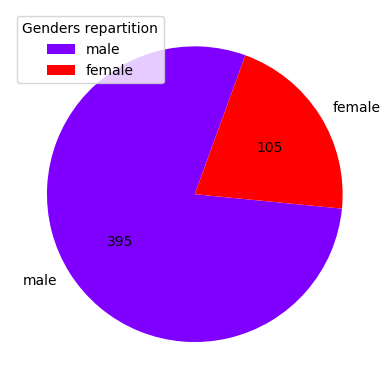

In [185]:
#Counter(genders)
y =  pd.Series(Counter(genders))
mylabels = ["male", "female"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct=lambda x: '{:.0f}'.format(x*y.sum()/100),colors=colors)
plt.legend(title = "Genders repartition",loc="upper left")
plt.savefig("../data/repartition/gender_bf_2000_top500.png", format="png",transparent=True)
plt.show() 

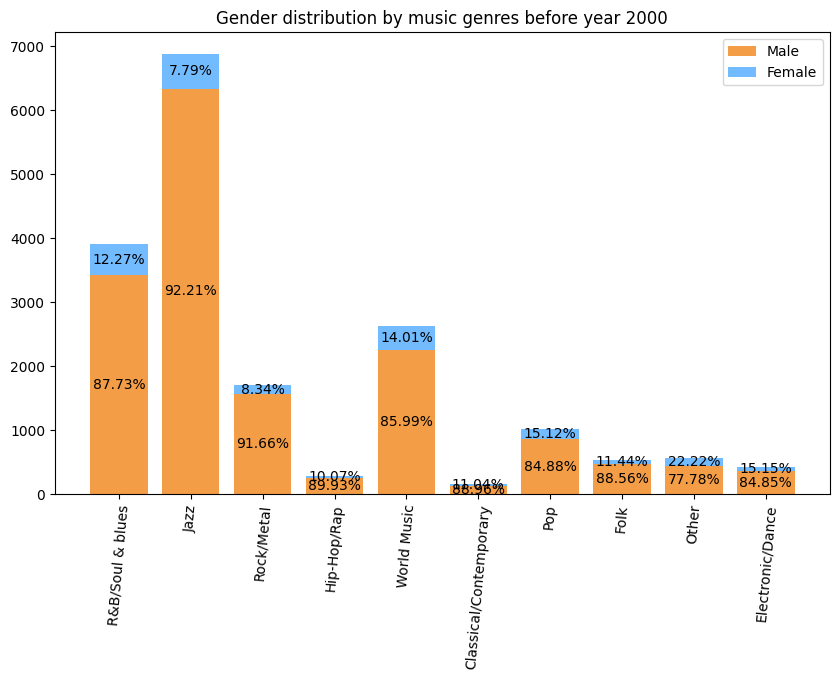

In [191]:
c = []
v = []             
for key, val in gender_dist_by_genre.items():
    c.append(key)
    v.append(val)
v = np.array(v)
fig, ax = plt.subplots(figsize=(10,6))


p= plt.bar(range(len(c)), v[:,0],label="Male",color="#f39d47",bottom= np.zeros(10))
ticklabel = [f"{'%.2f'%((100*a)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

p= plt.bar(range(len(c)), v[:,1], bottom=v[:,0],label="Female",color="#72bbff")
ticklabel = [f"{'%.2f'%((100*b)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

plt.title("Gender distribution by music genres before year 2000")
plt.xticks(range(len(c)), c,rotation=85)
plt.legend()
plt.savefig("../data/repartition/gender_dist_by_genre_bf2000.png", format="png",transparent=True)
plt.show()

In [23]:
gender_dist_by_genre_final

{'guitar': [3632, 220, 1],
 'recorder': [3208, 122, 0],
 'drums': [2926, 87, 0],
 'keyboards': [2080, 151, 2],
 'saxophone': [1557, 58, 0],
 'piano': [1303, 124, 2],
 'trumpet': [1170, 33, 0],
 'percussions': [1087, 100, 1],
 'trombone': [613, 17, 0],
 'flute': [355, 22, 0],
 'harmonica': [209, 4, 0],
 'dj': [177, 11, 0],
 'violin': [173, 90, 0],
 'clarinet': [129, 7, 0],
 'flugelhorn': [129, 2, 0]}

In [32]:
gender_dist_by_genre_final

{'guitar': [3632, 220, 1],
 'recorder': [3208, 122, 0],
 'drums': [2926, 87, 0],
 'keyboards': [2080, 151, 2],
 'saxophone': [1557, 58, 0],
 'piano': [1303, 124, 2],
 'trumpet': [1170, 33, 0],
 'percussions': [1087, 100, 1],
 'trombone': [613, 17, 0],
 'flute': [355, 22, 0],
 'harmonica': [209, 4, 0],
 'dj': [177, 11, 0],
 'violin': [173, 90, 0],
 'clarinet': [129, 7, 0],
 'flugelhorn': [129, 2, 0]}

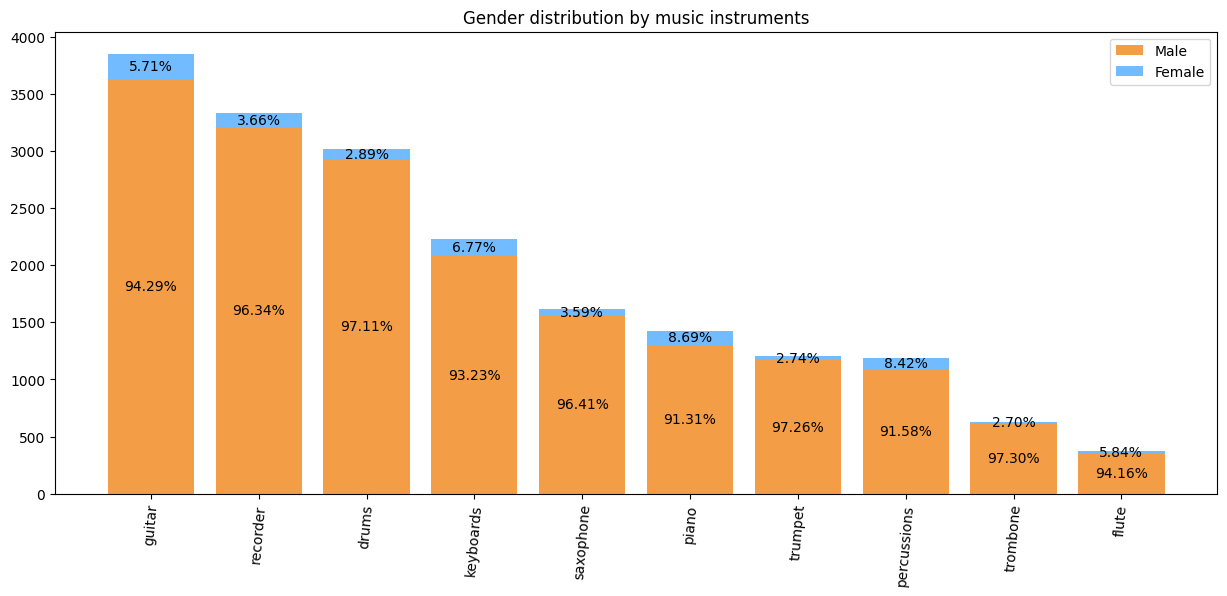

In [35]:
c = []
v = []             
for key, val in gender_dist_by_genre_final.items():
    c.append(key)
    v.append(val)
v = np.array(v)
fig, ax = plt.subplots(figsize=(15,6))

p= plt.bar(range(len(c)), v[:,0],label="Male",color="#f39d47",bottom= np.zeros(10))
ticklabel = [f"{'%.2f'%((100*a)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

p= plt.bar(range(len(c)), v[:,1], bottom=v[:,0],label="Female",color="#72bbff")
ticklabel = [f"{'%.2f'%((100*b)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

plt.title("Gender distribution by music instruments")
plt.xticks(range(len(c)), c,rotation=85)
plt.legend()
plt.savefig("../data/repartition/instrument_dist.png", format="png",transparent=True)
plt.show()


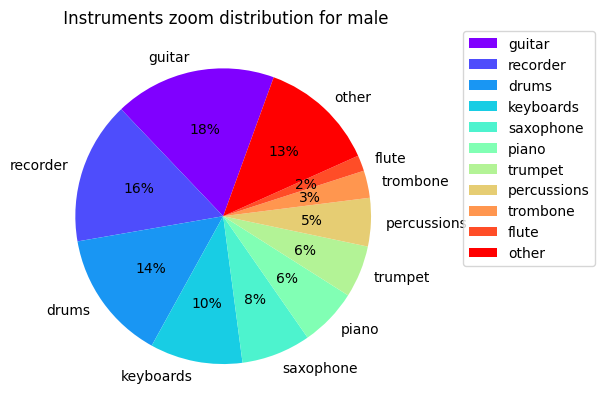

In [175]:
y =  pd.Series(Counter(male_role_dist_detailed_final))
mylabels = list(male_role_dist_detailed_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Instruments zoom distribution for male")
#plt.savefig("../data/repartition/instrument_zoom_dist_bf_2000_male_per.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

### Betweenness centrality

In [103]:
b_centralities = net.get_betweenness_centrality(mjf_collaboration_net)[0][:25]

In [115]:
get_details_by_centrality(b_centralities)

1 - claude nobs - Counter({'harmonica': 63, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - quincy jones - Counter({'vocals': 4})
3 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'synthesizer': 1})
4 - herbie hancock - Counter({'piano': 35, 'keyboards': 14})
5 - monty alexander - Counter({'piano': 21, 'keyboards': 3})
6 - angélique kidjo - Counter({'vocals': 17})
7 - toots thielemans - Counter({'harmonica': 13, 'guitar': 3})
8 - david sanborn - Counter({'saxophone': 32})
9 - chaka khan - Counter({'vocals': 20})
10 - gilberto gil - Counter({'guitar': 14, 'vocals': 12, 'percussions': 1, 'vocal': 1})
11 - paolo nutini - Counter({'vocals': 9, 'guitar': 2, 'vocal': 1})
12 - marcus miller - Counter({'recorder': 19, 'clarinet': 6, 'saxophone': 4, 'vocals': 2, 'turntables': 1, 'double bass': 1, 'keyboards': 1, 'gumbri': 1})
13 - elba ramalho - Counter({'vocals': 8})
14 - carlos santana - Counter({'guitar': 18, 'vocals': 4, 'percussions': 1})
15 - sophie hunger - Counter({'v

### Eigenvector centrality

In [13]:
e_centralities = net.get_eigenvector_centrality(mjf_collaboration_net)[0][:30]

In [16]:
get_details_by_centrality(e_centralities[:20])

1 - nathan east - Counter({'recorder': 23, 'vocals': 3})
2 - quincy jones - Counter({'none': 19, 'vocals': 4})
3 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'none': 2, 'synthesizer': 1})
4 - steve ferrone - Counter({'drums': 14, 'percussions': 2})
5 - greg phillinganes - Counter({'keyboards': 13, 'vocals': 2, 'piano': 2})
6 - claude nobs - Counter({'harmonica': 63, 'none': 9, 'harp': 1, 'vocals': 1, 'percussions': 1})
7 - ray cooper - Counter({'percussions': 8})
8 - paul milton jackson. jr - Counter({'guitar': 8})
9 - james "hutch" hutchinson - Counter({'recorder': 4, 'none': 4, 'vocals': 1})
10 - keith wilson - Counter({'vocal': 2, 'drums': 1, 'none': 1, 'vocals': 1})
11 - carmen momon - Counter({'none': 4})
12 - penny ray - Counter({'none': 4})
13 - linda d. cummings - Counter({'none': 4})
14 - melle mel - Counter({'vocals': 4})
15 - valerie simpson - Counter({'vocals': 3})
16 - kool moe dee - Counter({'vocals': 3})
17 - marilyn randolph - Counter({'none': 3})

### correlation between centralities

In [7]:
net.get_spearman_corr(mjf_collaboration_net)

Spearman corr between projected degree k and betweenness centrality is SignificanceResult(statistic=0.7035444174272443, pvalue=0.0)
Spearman corr between projected degree k and eigenvector centrality is SignificanceResult(statistic=0.997901868207399, pvalue=0.0)
Spearman corr between betweenness centrality and eigenvector centrality is SignificanceResult(statistic=0.7023793249650162, pvalue=0.0)


## Meta-Network genres

In [28]:
df = pd.read_csv("../data/genres/musician_genre.csv",sep=';')
df["genres"] = df["genres"].apply(lambda x : str(x).split(","))

In [11]:
df.head()

,id,genres
0,30407,[World Music]
1,9124,"[World Music, Electronic/Dance]"
2,30423,[World Music]
3,30421,[World Music]
4,30420,[World Music]


In [6]:
cat = None
with open("../data/genres/genres_cat.json",encoding="utf-8") as f:
            cat = json.load(f)  

In [ ]:
#if M1 and M2 collabored together multiple time weigth of edge increases, so what to do? count once the collaboration or leave it => solved
treated = set()
meta_net_genres = nx.Graph()
treated_node_weight = set()

for cate in cat['categories']:
    meta_net_genres.add_node(cate['category'],weight=0)

for n,d in mjf_collaboration_net.nodes(data=True):
    treated.add(int(str(n)[3:]))  
    musician_in = df[df['id'] == int(str(n)[3:])]   
    for g in musician_in['genres'].squeeze(): 
        meta_net_genres.nodes[g]['weight'] += 1 
         
    for neighbor in mjf_collaboration_net.neighbors(n):
        if int(str(neighbor)[3:]) not in treated :
            musician_out = df[df['id'] == int(str(neighbor)[3:])] 
            
            for g_in in musician_out['genres'].squeeze():
                for g2 in musician_in['genres'].squeeze():   
                    if g_in >= g2 : 
                        continue      
                    if not meta_net_genres.has_edge(g_in,g2) :                     
                        meta_net_genres.add_edge(g_in, g2,weight = 1)   
                    else :
                        meta_net_genres[g_in][g2]['weight'] += 1      
                                 

In [46]:
net.save_graph(meta_net_genres,"../networks/gephi/meta_net_genres_final.gexf")

### Meta network of jazz subgenres

In [7]:
normalized_dict = pd.json_normalize(cat['categories'], sep=',')
jazz_subgenres = list(normalized_dict[(normalized_dict['category'] == 'Jazz')]['genres'])[0]
jazz_subgenres.remove("Jazz")

In [8]:
jazz_subgenres_clean =list()
for g in jazz_subgenres :
    jazz_subgenres_clean.append(g.lower())

In [9]:
df = pd.read_csv("../data/genres/musician_jazz_sub_genre.csv",sep=';')
df["genres"] = df["genres"].apply(lambda x : str(x).split(","))

In [10]:
treated = set()
meta_net_genres = nx.Graph()
treated_node_weight = set()
#Initialize a node with weight zero for each jazz genre
for cate in jazz_subgenres_clean:
    meta_net_genres.add_node(cate,weight=0)

#loop over all node in colloboration network
for n,d in mjf_collaboration_net.nodes(data=True):
    treated.add(int(str(n)[3:]))  
    musician_in = df[df['id'] == int(str(n)[3:])]   
    musician_in_genre  = musician_in['genres'].squeeze()
  
    if  len(musician_in_genre) != 0 and str(musician_in_genre[0]) != 'nan':
    
        for g in musician_in_genre: 
             if g != "jazz":
                meta_net_genres.nodes[g]['weight'] += 1 
         
        for neighbor in mjf_collaboration_net.neighbors(n):
             if int(str(neighbor)[3:]) not in treated :
                musician_out = df[df['id'] == int(str(neighbor)[3:])] 
                musician_out_genre = musician_out['genres'].squeeze()
                if len(musician_out_genre)!=0 and str(musician_out_genre[0])!= 'nan':
                    for g_in in musician_out_genre:
                        for g2 in musician_in_genre:   
                            if g_in >= g2 or g_in == "jazz" or g2 == "jazz": 
                                continue      
                            if not meta_net_genres.has_edge(g_in,g2) :                     
                                meta_net_genres.add_edge(g_in, g2,weight = 1)   
                            else :
                                meta_net_genres[g_in][g2]['weight'] += 1      
                                 

In [11]:
net.save_graph(meta_net_genres,"../networks/gephi/mjf/meta-networks/mjf_meta_net_jazz_subgenres.gexf")

## Role specific network

In [10]:
instruments = pd.read_csv("../data/instruments/mjf_instruments.csv",sep=",")
instruments.head()

,name
0,ableton
1,accordion
2,acoustic drums
3,ad
4,agogo


In [11]:
cnames=['instrument','nb_nodes' ,'size_of_the_GC', 'fraction_of_omitted_edges','nb_of_omitted_edges','nb_edges']
df = pd.DataFrame(columns=cnames)

In [12]:
for instru in instruments['name']:

    role_specific_network = net.build_role_specific_network(results,'name','musicians','date','categories',instru)
    collaborators = [x for x,y in role_specific_network.nodes(data=True) if y['type']=='Artist']
    role_specific_network = nx.projected_graph(role_specific_network, collaborators, multigraph=False)
    largest_cc = max(nx.connected_components(role_specific_network), key=len)
    largest_cc = role_specific_network.subgraph(largest_cc)
    
    nb_nodes = len(largest_cc)
    per_size_of_GC = (len(largest_cc) *100)/len(mjf_collaboration_net)
    per_ommited_eges = 100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges)

    df.loc[-1]  = [instru,nb_nodes,per_size_of_GC,per_ommited_eges,abs(len(role_specific_network.edges) - len(mjf_collaboration_net.edges) ),len(largest_cc.edges)]
    df.index = df.index + 1
    #print("Number of nodes in the giant component",len(largest_cc))
    #print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")
    #print("Fraction of ommited edges:",100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges),"%")
df = df.sort_index() 
df = df.sort_values('size_of_the_GC')

In [13]:
df = df.iloc[0:len(df)-1,:]

In [14]:
df.describe()

,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
count,254.000000,254.000000,254.000000,254.000000,254.00000
mean,11658.917323,66.097383,0.717392,776.433071,89630.07874
std,322.996367,1.831149,3.183746,3445.768187,3172.89904
min,8758.000000,49.651341,0.000000,0.000000,61270.00000
25%,11721.000000,66.449345,0.006699,7.250000,90296.00000
50%,11726.000000,66.477691,0.016631,18.000000,90345.00000
75%,11727.000000,66.483361,0.069297,75.000000,90355.75000
max,11727.000000,66.483361,29.337522,31752.000000,90359.00000


In [34]:
#Social network
df.iloc[0:10,:]

,instrument,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
9,vocals,8758,49.651341,29.337522,31752,61270
146,guitar,9400,53.291003,20.464751,22149,70556
181,drums,9775,55.416974,17.463735,18901,73625
71,recorder,9818,55.660752,19.276541,20863,72571
124,keyboards,10404,58.982936,13.490714,14601,77341
63,saxophone,10665,60.462611,13.186732,14272,76888
79,percussions,10750,60.944498,9.597154,10387,80208
78,piano,10864,61.590793,6.969417,7543,79672
22,trumpet,10867,61.607801,11.993902,12981,77601
23,trombone,11178,63.370939,7.614340,8241,81960


In [16]:
cnames=['instrument','nb_nodes' ,'size_of_the_GC', 'fraction_of_omitted_edges','nb_of_omitted_edges','nb_edges']
df2 = pd.DataFrame(columns=cnames)
for instru in instruments['name']:

    role_specific_network = net.build_role_specific_network(results,'name','musicians','date','categories',instru)
    albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
    role_specific_network = nx.projected_graph(role_specific_network, albums, multigraph=False)
    largest_cc = max(nx.connected_components(role_specific_network), key=len)
    largest_cc = role_specific_network.subgraph(largest_cc)
    
    nb_nodes = len(largest_cc)
    per_size_of_GC = (len(largest_cc) *100)/len(mjf_event_net)
    per_ommited_eges = 100 - (len(role_specific_network.edges)*100)/len(mjf_event_net.edges)
    df2.loc[-1]  = [instru,nb_nodes,per_size_of_GC,per_ommited_eges,abs(len(role_specific_network.edges) - len(mjf_event_net.edges) ),len(largest_cc.edges)]
    df2.index = df2.index + 1
    #print("Number of nodes in the giant component",len(largest_cc))
    #print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")
    #print("Fraction of ommited edges:",100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges),"%")
df2 = df2.sort_index() 
df2 = df2.sort_values('size_of_the_GC')    


In [17]:
df2 = df2.iloc[0:len(df2)-1,:]

In [38]:
df2.describe()

,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
count,254.000000,254.000000,254.000000,254.000000,254.000000
mean,2867.649606,67.001159,0.475290,104.834646,21608.468504
std,38.684281,0.903838,2.361017,520.769509,526.658905
min,2454.000000,57.336449,0.000000,0.000000,17282.000000
25%,2874.000000,67.149533,0.000000,0.000000,21710.250000
50%,2875.000000,67.172897,0.000000,0.000000,21715.000000
75%,2875.000000,67.172897,0.022669,5.000000,21715.000000
max,2875.000000,67.172897,20.088861,4431.000000,21715.000000


In [40]:
df2.iloc[0:10,:]

,instrument,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
9,vocals,2454,57.336449,20.088861,4431,17282
146,guitar,2558,59.766355,14.367321,3169,18512
181,drums,2703,63.154206,8.500703,1875,19767
78,piano,2709,63.294393,17.296096,3815,17898
71,recorder,2729,63.761682,9.022079,1990,19649
124,keyboards,2756,64.392523,12.485832,2754,18886
63,saxophone,2796,65.327103,7.163259,1580,20082
79,percussions,2801,65.443925,3.096523,683,21006
22,trumpet,2819,65.864486,3.599764,794,20892
138,harmonica,2828,66.074766,12.975473,2862,18835


In [18]:
stats.pearsonr(df2["nb_nodes"], df2["nb_of_omitted_edges"])

PearsonRResult(statistic=-0.9095932051988409, pvalue=4.183013389773094e-98)

In [15]:
stats.pearsonr(df["nb_nodes"], df["nb_of_omitted_edges"])

PearsonRResult(statistic=-0.9917888461621526, pvalue=4.206727599543351e-227)